# Decision Tree & Random Forest

---


By - Kapil Panwar


[Whatsapp](https://qrgo.page.link/TMiTp) & 
[YouTUBE](https://qrgo.page.link/wh5tq)

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [46]:
df = pd.read_csv("./Titanic_dataset/train.csv")

In [47]:
df.shape

(891, 12)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

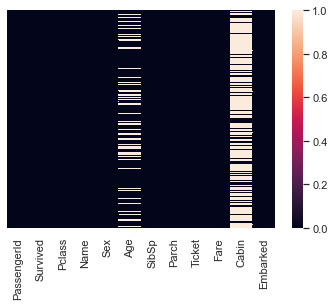

In [50]:
sns.heatmap(df.isnull(), yticklabels=False)

<AxesSubplot:>

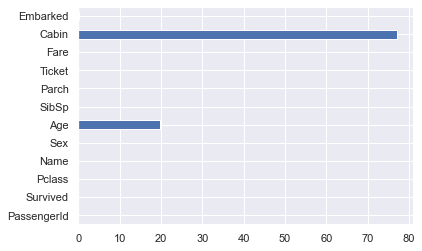

In [51]:
(df.isnull().sum()/len(df)*100).plot(kind = 'barh')

In [52]:
df = df.drop("Cabin", axis = 1)

<AxesSubplot:>

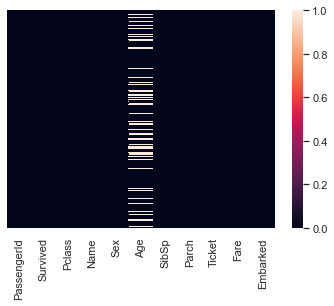

In [53]:
sns.heatmap(df.isnull(), yticklabels=False)

<AxesSubplot:ylabel='Frequency'>

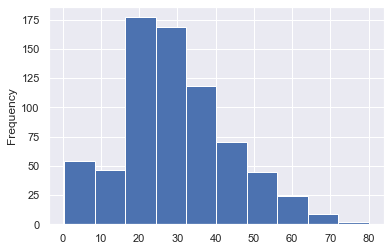

In [54]:
df['Age'].plot(kind='hist')

<AxesSubplot:xlabel='Survived', ylabel='count'>

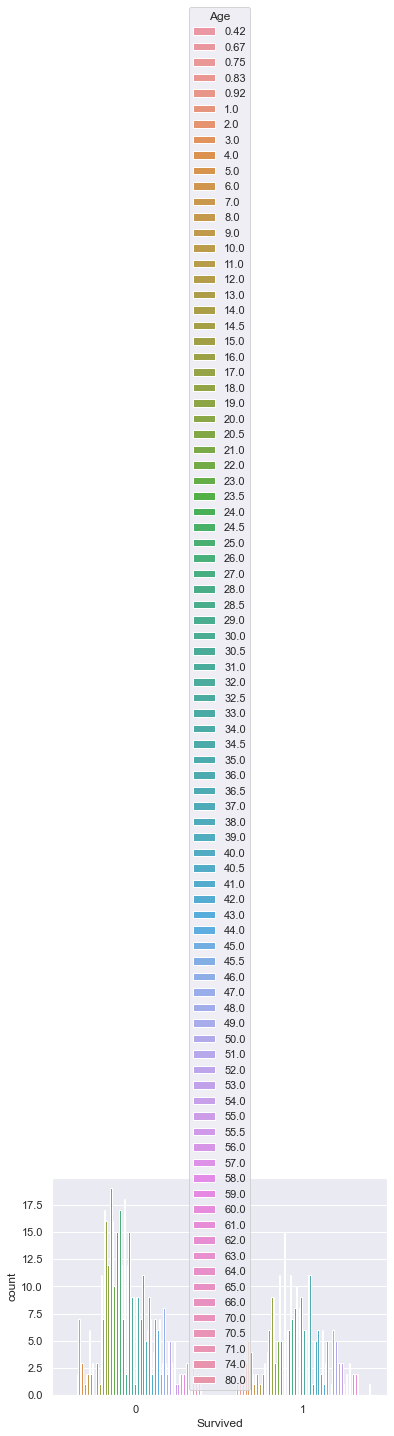

In [55]:
sns.countplot(x = 'Survived', hue = 'Age', data=df)

<AxesSubplot:ylabel='Density'>

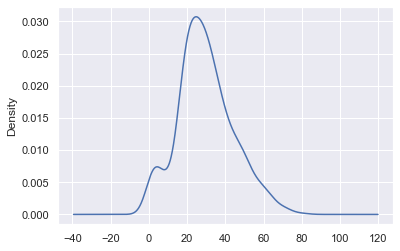

In [56]:
df['Age'].plot(kind = 'kde')

In [57]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
np.median(df['Age'])

nan

In [59]:
from sklearn.impute import SimpleImputer


In [60]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si = si.fit(df['Age'].values.reshape(-1,1))

df['Age_'] = si.transform(df['Age'].values.reshape(-1,1))

<AxesSubplot:ylabel='Density'>

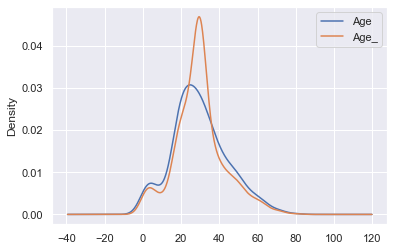

In [61]:
df[['Age','Age_']].plot(kind = 'kde')

<AxesSubplot:>

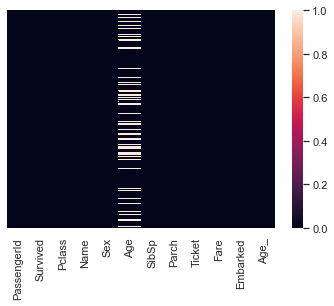

In [62]:
sns.heatmap(df.isnull(), yticklabels=False)

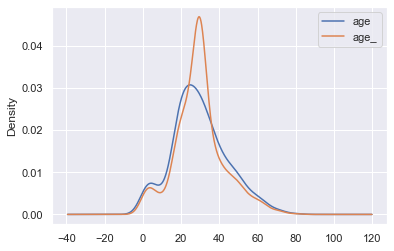

In [63]:
df['Age'].plot(kind = 'kde', label='age')
df['Age_'].plot(kind = 'kde', label='age_')
plt.legend(loc = 'best')

In [64]:
df['Age'] = df['Age_']

In [65]:
df = df.drop("Age_", axis = 1)

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
dummy_list = ['Pclass','Sex','Embarked']


In [73]:

for i in dummy_list:
    tempdf = pd.get_dummies(df[i], drop_first=True)
    df = df.drop(i, axis = 1)
    df = pd.concat([df,tempdf], axis = 1)

In [74]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,2,3,male,Q,S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,1


In [75]:
df = df.drop(['PassengerId','Name','Ticket','Fare'], axis = 1)

In [76]:
df.head()

,Survived,Age,SibSp,Parch,2,3,male,Q,S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


In [77]:
from sklearn.preprocessing import StandardScaler

In [79]:
X = df.drop("Survived", axis =1 )
y = df['Survived']

In [80]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
np.mean(X), np.min(X), np.max(X)

(1.3457248783335231e-17, -2.2531554887793948, 6.974147318082627)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier()

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.2, random_state = 1)

In [105]:
dt = dt.fit(X_train, y_train)

In [106]:
y_pred = dt.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [108]:
accuracy_score(y_test, y_pred)

0.7713884992987378

In [109]:
confusion_matrix(y_test, y_pred)

array([[350,  82],
       [ 81, 200]])

---

# Decision Tree Charts

---

## Text Chart

In [94]:
from sklearn import tree

In [95]:
test_chart = tree.export_text(dt)
print(test_chart)

|--- feature_5 <= -0.31
|   |--- feature_4 <= -0.10
|   |   |--- feature_0 <= -2.09
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -2.09
|   |   |   |--- feature_0 <= 0.56
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.56
|   |   |   |   |--- feature_0 <= 0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.68
|   |   |   |   |   |--- feature_0 <= 1.14
|   |   |   |   |   |   |--- feature_3 <= 0.73
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  0.73
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  1.14
|   |   |   |   |   |   |--- class: 1
|   |--- feature_4 >  -0.10
|   |   |--- feature_1 <= 1.79
|   |   |   |--- feature_0 <= -0.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.10
|   |   |   |   |--- feature_1 <= -0.02
|   |   |   |   |   |--- feature_7 <= -0.50
|   |   |   |   |   |   |--- feature_2 <= 0.77
|   |   |   |   |   |   |   |--- feature_0 <= 0.03
|

## Plot Graph

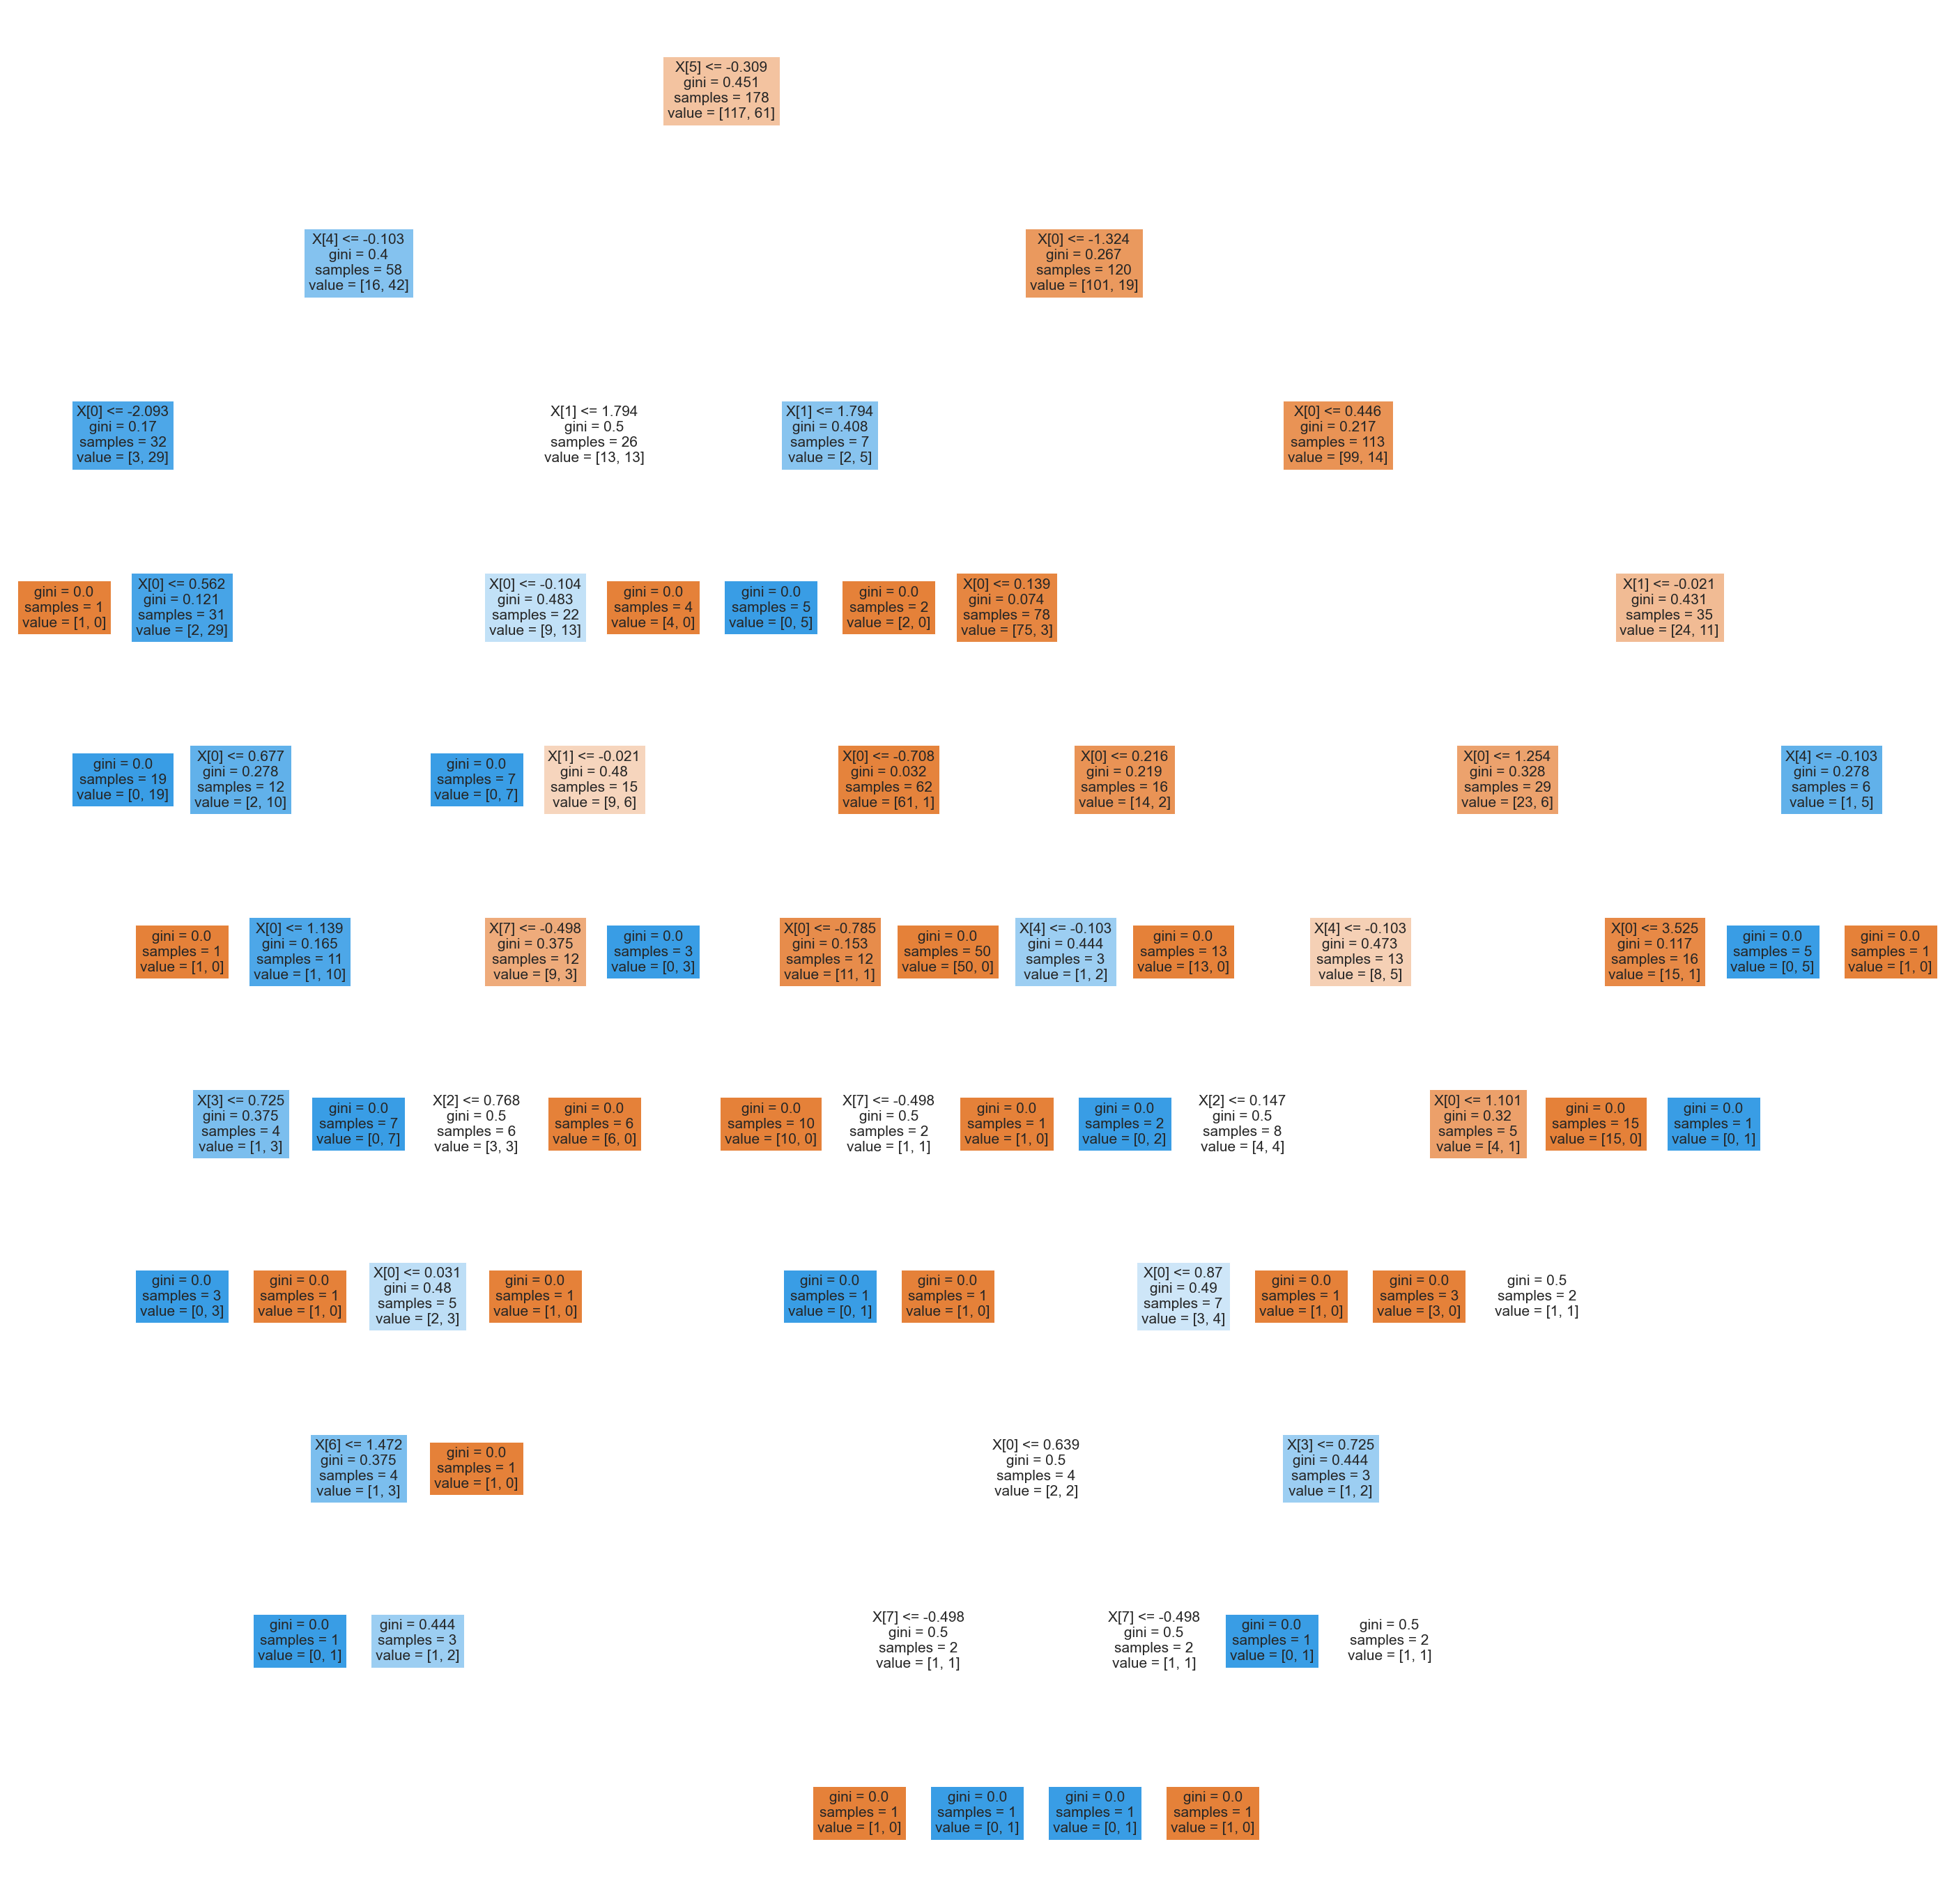

In [99]:
f = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dt, filled = True)
plt.show(_)

## Plot Graph -2

**Execute only if you are using high computational servers**

In [ ]:
from dtreeviz.trees import dtreeviz

dtreeviz(dt)